In [4]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


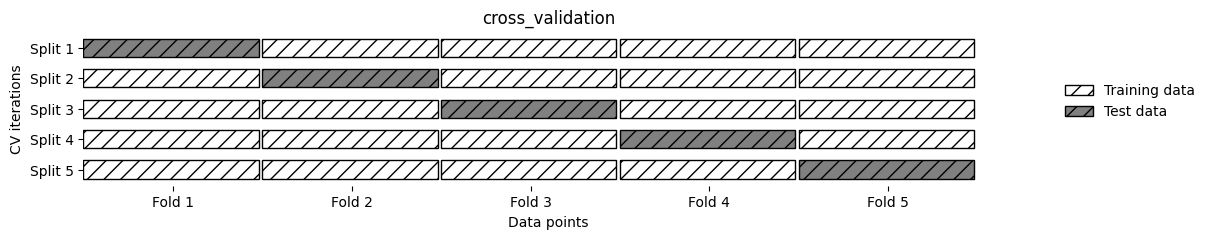

In [8]:
import mglearn
mglearn.plots.plot_cross_validation()

In [12]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import accuracy_score

# Suppress convergence warnings (optional)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load dataset (replace with your own dataset)
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline: scaling + logistic regression
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # Increased iterations
)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [18]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [16]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


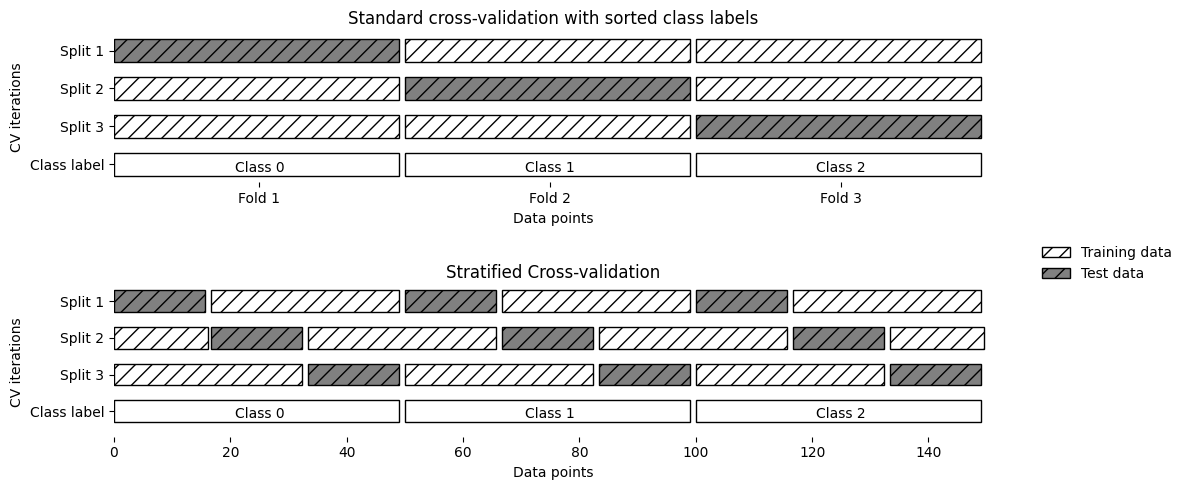

In [22]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [24]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [26]:
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [28]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [30]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


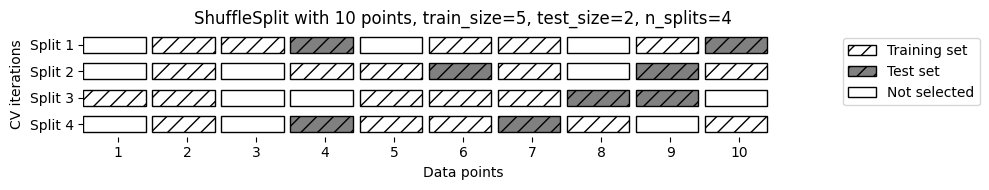

In [34]:
mglearn.plots.plot_shuffle_split()

In [36]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96       0.93333333 0.97333333 0.94666667 0.96       0.96
 0.97333333 0.96       0.93333333 0.97333333]


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Example data (replace with your actual data)
X = np.random.rand(12, 5)
y = np.random.randint(0, 2, 12)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]  # Group IDs

# Model with pipeline
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Correct call: pass groups as keyword argument
scores = cross_val_score(logreg, X, y, cv=GroupKFold(n_splits=3), groups=groups)

print("Cross-validation scores:\n", scores)


Cross-validation scores:
 [0.5        0.4        0.33333333]


In [48]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Balanced labels
y = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
X = np.random.rand(12, 5)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

cv = GroupKFold(n_splits=3)
scores = cross_val_score(model, X, y, cv=cv, groups=groups)

print("Cross-validation scores:", scores)
print("Mean score:", np.nanmean(scores))  # use nanmean to skip any NaN


Cross-validation scores: [0.5        0.4        0.66666667]
Mean score: 0.5222222222222223


In [52]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
iris = load_iris()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# Parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters:", grid_search.best_params_)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))


Best cross-validation score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Test set score: 0.97


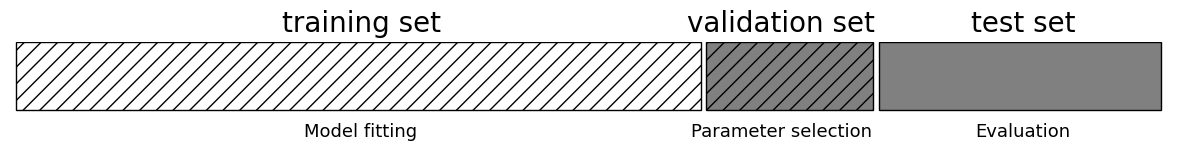

In [54]:
mglearn.plots.plot_threefold_split()

In [58]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split data into train+validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# Split train+validation into actual train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {} | validation set: {} | test set: {}".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

# Grid search on validation set
best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# Retrain on full training + validation set using best parameters
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

# Output results
print("\nBest score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 84 | validation set: 28 | test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [62]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Split data into train+validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# Split train+validation into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {} | validation set: {} | test set: {}".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

# Grid search on validation set
best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Train SVM with this combination of parameters
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)

        # Update best score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# Retrain on entire training + validation set using best parameters
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

# Print final results
print("\nBest score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 84 | validation set: 28 | test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


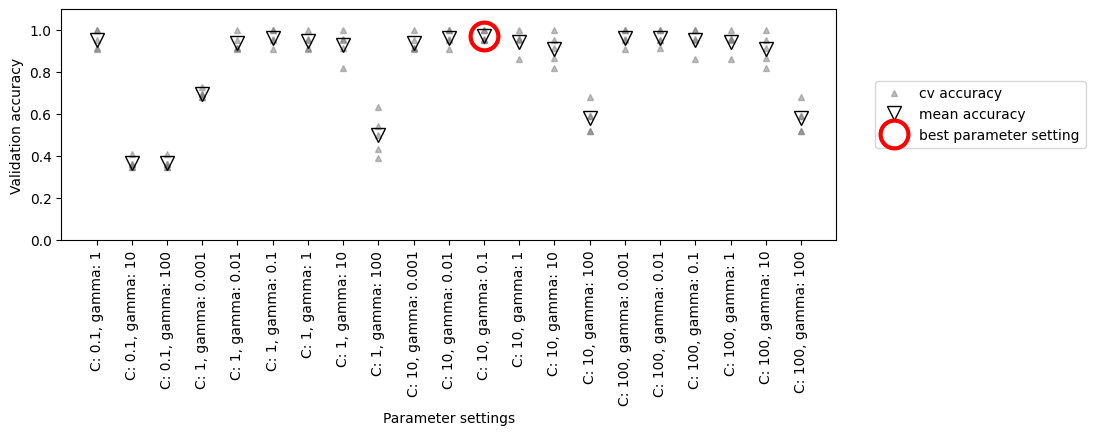

In [64]:
mglearn.plots.plot_cross_val_selection()

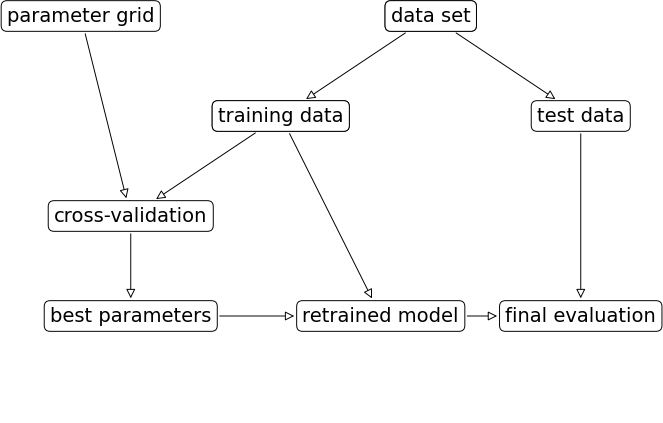

In [66]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)


In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [74]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [76]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [78]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [80]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002594,0.000516,0.001740,0.000424,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.003862,0.002129,0.002447,0.000458,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.002614,0.000506,0.001506,0.000637,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001929,0.000420,0.001023,0.000011,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001494,0.000603,0.001332,0.000397,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


TypeError: Only length-1 arrays can be converted to Python scalars

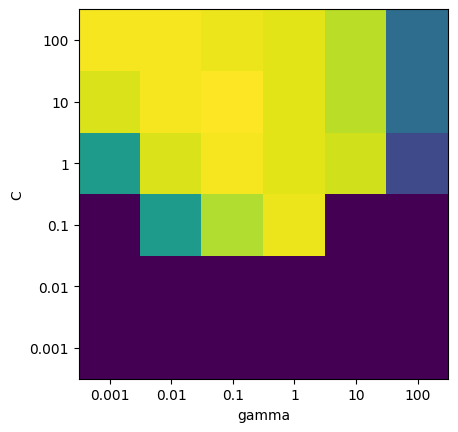

In [88]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# Grid search parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

# Reshape mean test scores to 6x6 grid
scores = grid_search.cv_results_['mean_test_score']
scores_reshaped = np.array(scores).reshape(6, 6)

# Heatmap
mglearn.tools.heatmap(scores_reshaped,
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap="viridis", fmt="%.2f")
plt.show()
